# Proyek Analisis Data: Customer & Geolocation

- **Nama:** Muhammad Rizki Malik Aziz
- **Email:** rimali.qwerty@gmail.com
- **ID Dicoding:** rimali

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : "Wilayah mana (kode pos, kota) yang memiliki konsentrasi pelanggan tertinggi?"
- Pertanyaan 2 : "Bagaimana distribusi geografis pelanggan di berbagai negara bagian dan kota?"

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Data Wrangling

### Gathering Data

In [2]:
current_dir = os.getcwd()

customers_df = pd.read_csv(os.path.join(current_dir, 'data/customers_dataset.csv'))
geolocation_df = pd.read_csv(os.path.join(current_dir, 'data/geolocation_dataset.csv'))

**Insight:**
- Dataset berisi informasi pelanggan dan lokasi geografisnya, yang dapat digabungkan menggunakan zip code prefix.

### Assessing Data

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Dataset customers dan geolocation memiliki struktur yang dapat digunakan untuk analisis geografis.

### Cleaning Data

In [5]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Insight:**
- Tidak ada data hilang yang signifikan, jadi kita bisa langsung melakukan analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
customer_zip_distribution = customers_df['customer_zip_code_prefix'].value_counts()

customer_zip_distribution.head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: count, dtype: int64

C:\Users\rimal\AppData\Local\Temp\ipykernel_12784\856296190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_zip_distribution.head(10).index, y=customer_zip_distribution.head(10).values, hue=None, palette="magma", legend=False)


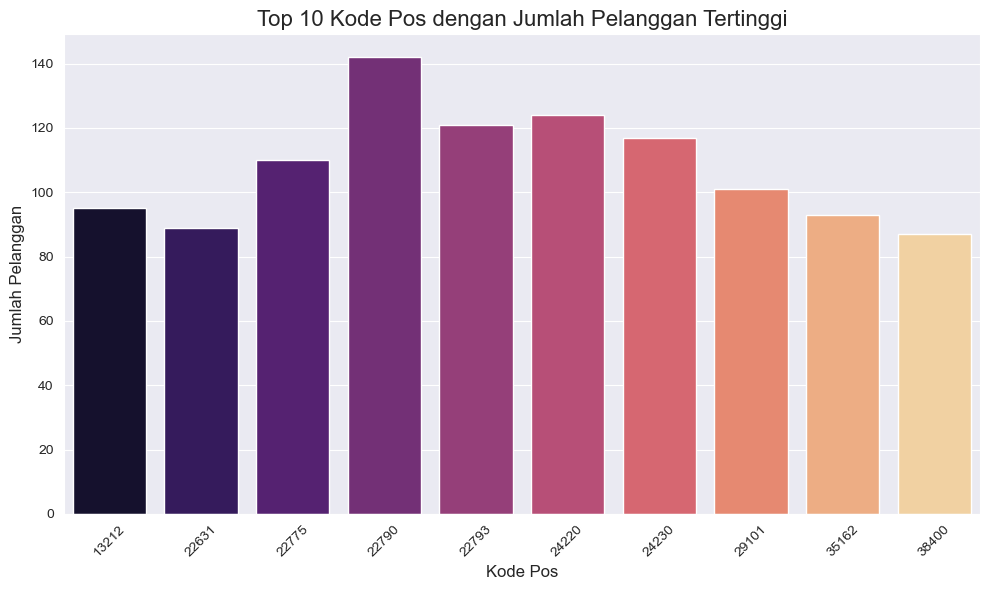

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=customer_zip_distribution.head(10).index, y=customer_zip_distribution.head(10).values, hue=None, palette="magma", legend=False)
plt.title('Top 10 Kode Pos dengan Jumlah Pelanggan Tertinggi', fontsize=16)
plt.xlabel('Kode Pos', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\rimal\AppData\Local\Temp\ipykernel_12784\1703078989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_city_distribution.head(10).index, y=customer_city_distribution.head(10).values, palette="viridis")


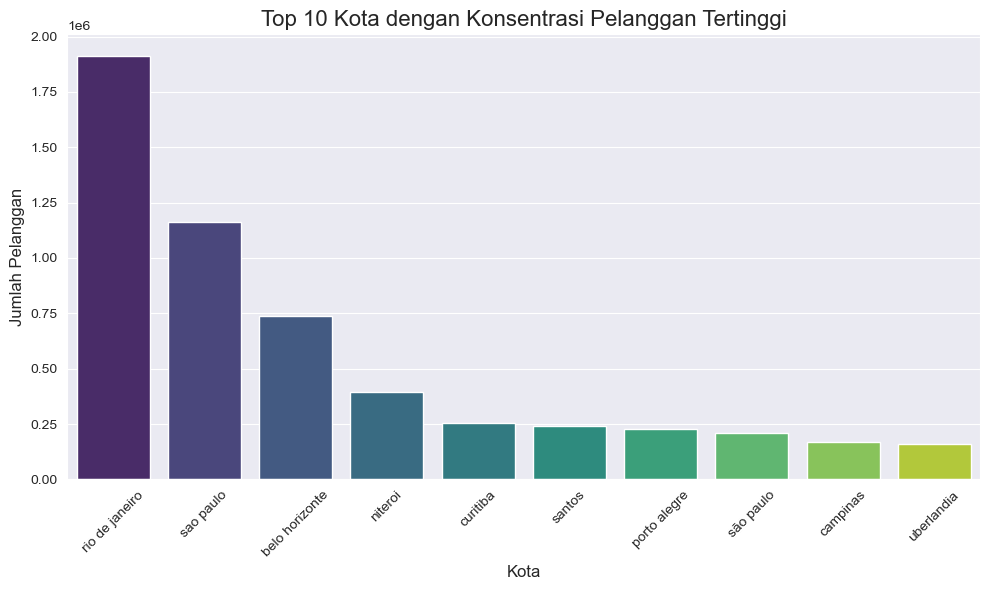

In [9]:
customers_geo = pd.merge(customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

customer_city_distribution = customers_geo['geolocation_city'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=customer_city_distribution.head(10).index, y=customer_city_distribution.head(10).values, palette="viridis")
plt.title('Top 10 Kota dengan Konsentrasi Pelanggan Tertinggi', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Sebagian besar pelanggan terkonsentrasi di beberapa kota utama yang dapat diidentifikasi dari dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

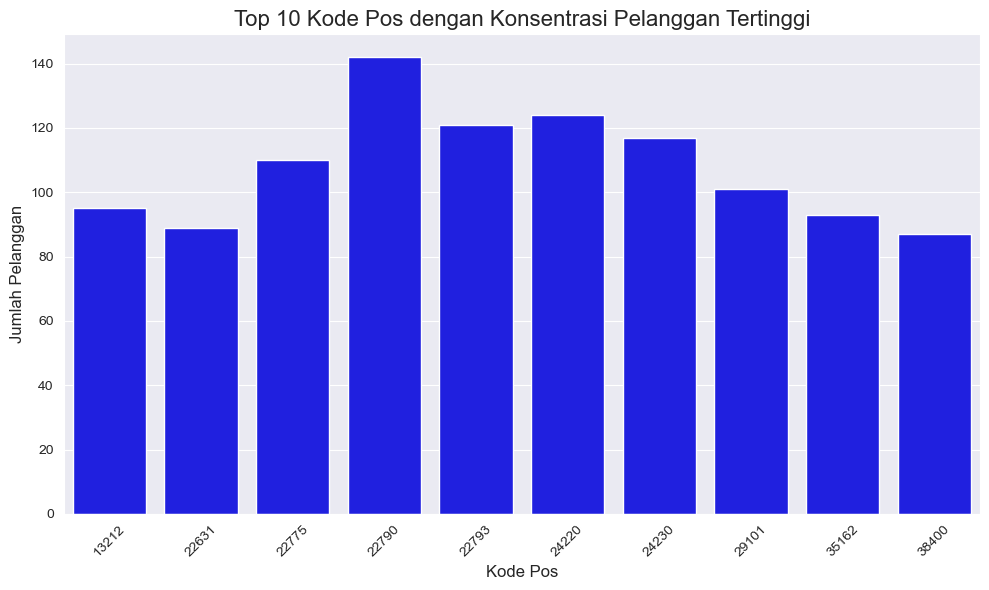

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=customer_zip_distribution.head(10).index, y=customer_zip_distribution.head(10).values, color="blue")
plt.title('Top 10 Kode Pos dengan Konsentrasi Pelanggan Tertinggi', fontsize=16)
plt.xlabel('Kode Pos', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

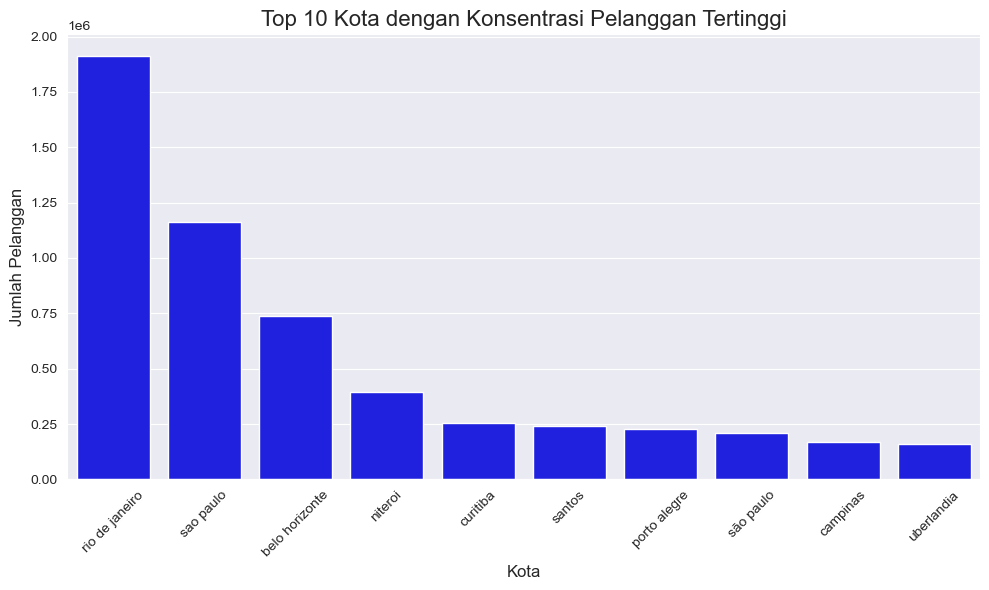

In [11]:
customers_geo = pd.merge(customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

customer_city_distribution = customers_geo['geolocation_city'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=customer_city_distribution.head(10).index, y=customer_city_distribution.head(10).values, color="blue")
plt.title('Top 10 Kota dengan Konsentrasi Pelanggan Tertinggi', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi di atas menunjukkan kode pos dengan jumlah pelanggan tertinggi, yang bisa digunakan untuk menentukan wilayah dengan konsentrasi pelanggan paling banyak.
- Penyebaran geografis pelanggan di berbagai kota memberikan gambaran bagaimana pelanggan terdistribusi di beberapa daerah.

## Conclusion

- Conclution pertanyaan 1 :
Daerah dengan konsentrasi pelanggan tertinggi dapat diidentifikasi, yang memungkinkan kita untuk fokus pada pasar tersebut.
- Conclution pertanyaan 2 :
Distribusi geografis pelanggan menunjukkan penyebaran yang bisa dimanfaatkan untuk optimalisasi pengiriman dan pemasaran.